# problem statement

The titanic dataset provides info on the fate of the passangeres on the titanic,summarized according to economic status,sex,age,and survival

# OUR TASK IS TO PREDICT THE SURVIVAL OF THE TITANIC PASSANGERS



#1) data exploration,perform missing data check, which features are important

#2) COnvert categorical data into numerical ones

#3) Build a classifier to predic survival

#4) Evaluate teh classifcation model, using the classification report

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes= True)  # set the style,color code, and font scale of the plot
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
df_train= pd.read_csv("C:/Users/Dell/Desktop/ML_Simply_Learn_practice/DATASETS/Demo Datasets/Lesson 4/train.csv")
df_test= pd.read_csv("C:/Users/Dell/Desktop/ML_Simply_Learn_practice/DATASETS/Demo Datasets/Lesson 4/test.csv")
df_train.shape
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
 df_train.Survived.value_counts() # 1 survive, 0 did not

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train.isnull().sum() # see cabin has a lot of missing values
# we will drop that value completly

# for the age we will find a way to approx these values, bcs is a relevat predictor for the survuval rate

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.groupby(['Pclass']).mean()
# i grupon sipas classave te pasagjerve, pastaj i gjen mesataren per cdo klase

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [8]:
# name, passenger ID and ticket number are irrelevant for predicting survivability

df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# we need to deal with the missing values in the age variable


# Write a function to find each null value in the age variable
 # we will asign the age of each null value based on the passenger class
    
    
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 25
    else:
            return Age

In [10]:
# for each null value this function will check the value of the passenger class 
# and decide an age value according to the average age of passengers in that class

# Replace null values in dataframe

df_train['Age']=df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [11]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df_train.dtypes  # sex and Embarked are categorical data

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [14]:
# we convert these data to numerical values

df_train_dummied= pd.get_dummies(df_train,columns=['Sex'])

In [15]:
df_train_dummied= pd.get_dummies(df_train_dummied,columns=['Embarked'])

In [16]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

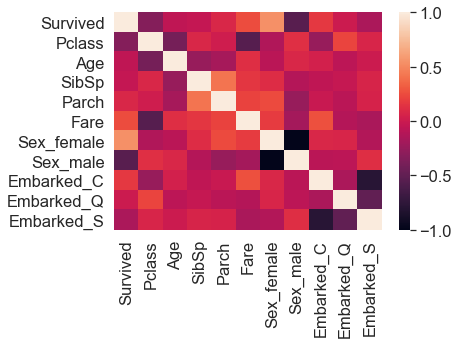

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [18]:
used_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female','Sex_male'
                ,'Embarked_C', 'Embarked_Q', 'Embarked_S']

X=df_train_dummied[used_features].values # independent values
y=df_train_dummied['Survived'] # dependent values

In [19]:
# splitting the dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [21]:
# train the classifier

LogReg = LogisticRegression()

LogReg.fit(X_train,y_train) # apply the logistic regression in training set



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# storethe prediction given by the classifier

y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [23]:
metrics.confusion_matrix(y_test,y_pred) # evaluate the accuracy of classification

array([[143,  23],
       [ 20,  81]], dtype=int64)

In [24]:
metrics.accuracy_score(y_test,y_pred)
# 83% accurecy

0.8389513108614233

In [25]:
len(X_test)

267

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       166
           1       0.78      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [27]:
LogReg.coef_

array([[-1.04399265, -0.04032503, -0.24266183, -0.04369954,  1.17742407,
        -1.20560443,  0.32632923, -0.03178822, -0.32272138]])

In [28]:
LogReg.intercept_

array([3.70647792])

In [29]:
LogReg.predict_log_proba(X_test)

array([[-1.32902053, -0.30752625],
       [-0.92096553, -0.50772119],
       [-0.05411696, -2.94354417],
       [-1.36858943, -0.29365407],
       [-0.05794861, -2.87703308],
       [-2.00740891, -0.14425878],
       [-1.10542716, -0.40207501],
       [-0.65759308, -0.73001213],
       [-0.24605265, -1.52271474],
       [-0.90153623, -0.52078431],
       [-0.30177561, -1.3451677 ],
       [-1.54785411, -0.23915089],
       [-0.29255562, -1.37181464],
       [-1.93829716, -0.15542516],
       [-0.14726625, -1.98824272],
       [-1.00045972, -0.45840769],
       [-0.1112785 , -2.25084254],
       [-1.21301765, -0.35282349],
       [-1.73527353, -0.19401197],
       [-0.91988442, -0.50843698],
       [-0.10075847, -2.34498523],
       [-0.59936507, -0.79664322],
       [-0.14655991, -1.99270613],
       [-0.06516273, -2.76327211],
       [-0.65791977, -0.72966102],
       [-0.66222875, -0.72505215],
       [-3.23845245, -0.04001456],
       [-0.14183947, -2.02314097],
       [-0.10462409,